<center><div style="font-size : 20px; font-weight : bold; color : darkbue;">PENGANTAR DATA SCIENCE</div>
<div>Eksplorasi Dataset Banking</div>
<hr>
<div>6182001004 | William Surya W - 6182001005 | Kae Zarren L H - 6182001042 | Ester Oka N</div>

In [32]:
#import library
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; from sklearn.metrics import *;

from sklearn.feature_selection import *; from sklearn.model_selection import *; from sklearn.neighbors import *; from sklearn import preprocessing;

import seaborn as sns;

In [33]:
#load dataset
url = ['https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/bike-dt/day.csv'
        ,'https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/bike-dt/hour.csv'];

day = pd.read_csv(url[0], sep=",", encoding='cp1252');
hour = pd.read_csv(url[1], sep=",", encoding='cp1252');

In [34]:
#data preparation
day_features = day[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']];

day_features_np = np.array(day_features.values);

day_labels = day[['cnt']];

day_labels_np = np.array(day_labels.values);
day_labels_np = day_labels_np.ravel();

In [35]:
#metode selection (1) : chi-square
k = 4;
selector = SelectKBest(score_func = chi2, k=4);
selector.fit(day_features_np, day_labels_np);

cols = selector.get_support(indices=True);
day_features = day_features.iloc[:,cols];

day_features_np = np.array(day_features.values);

print (str(k)+" Kolom dengan nilai Chi Square terbaik adalah ")
print(day_features.columns);

4 Kolom dengan nilai Chi Square terbaik adalah 
Index(['yr', 'mnth', 'holiday', 'weekday'], dtype='object')


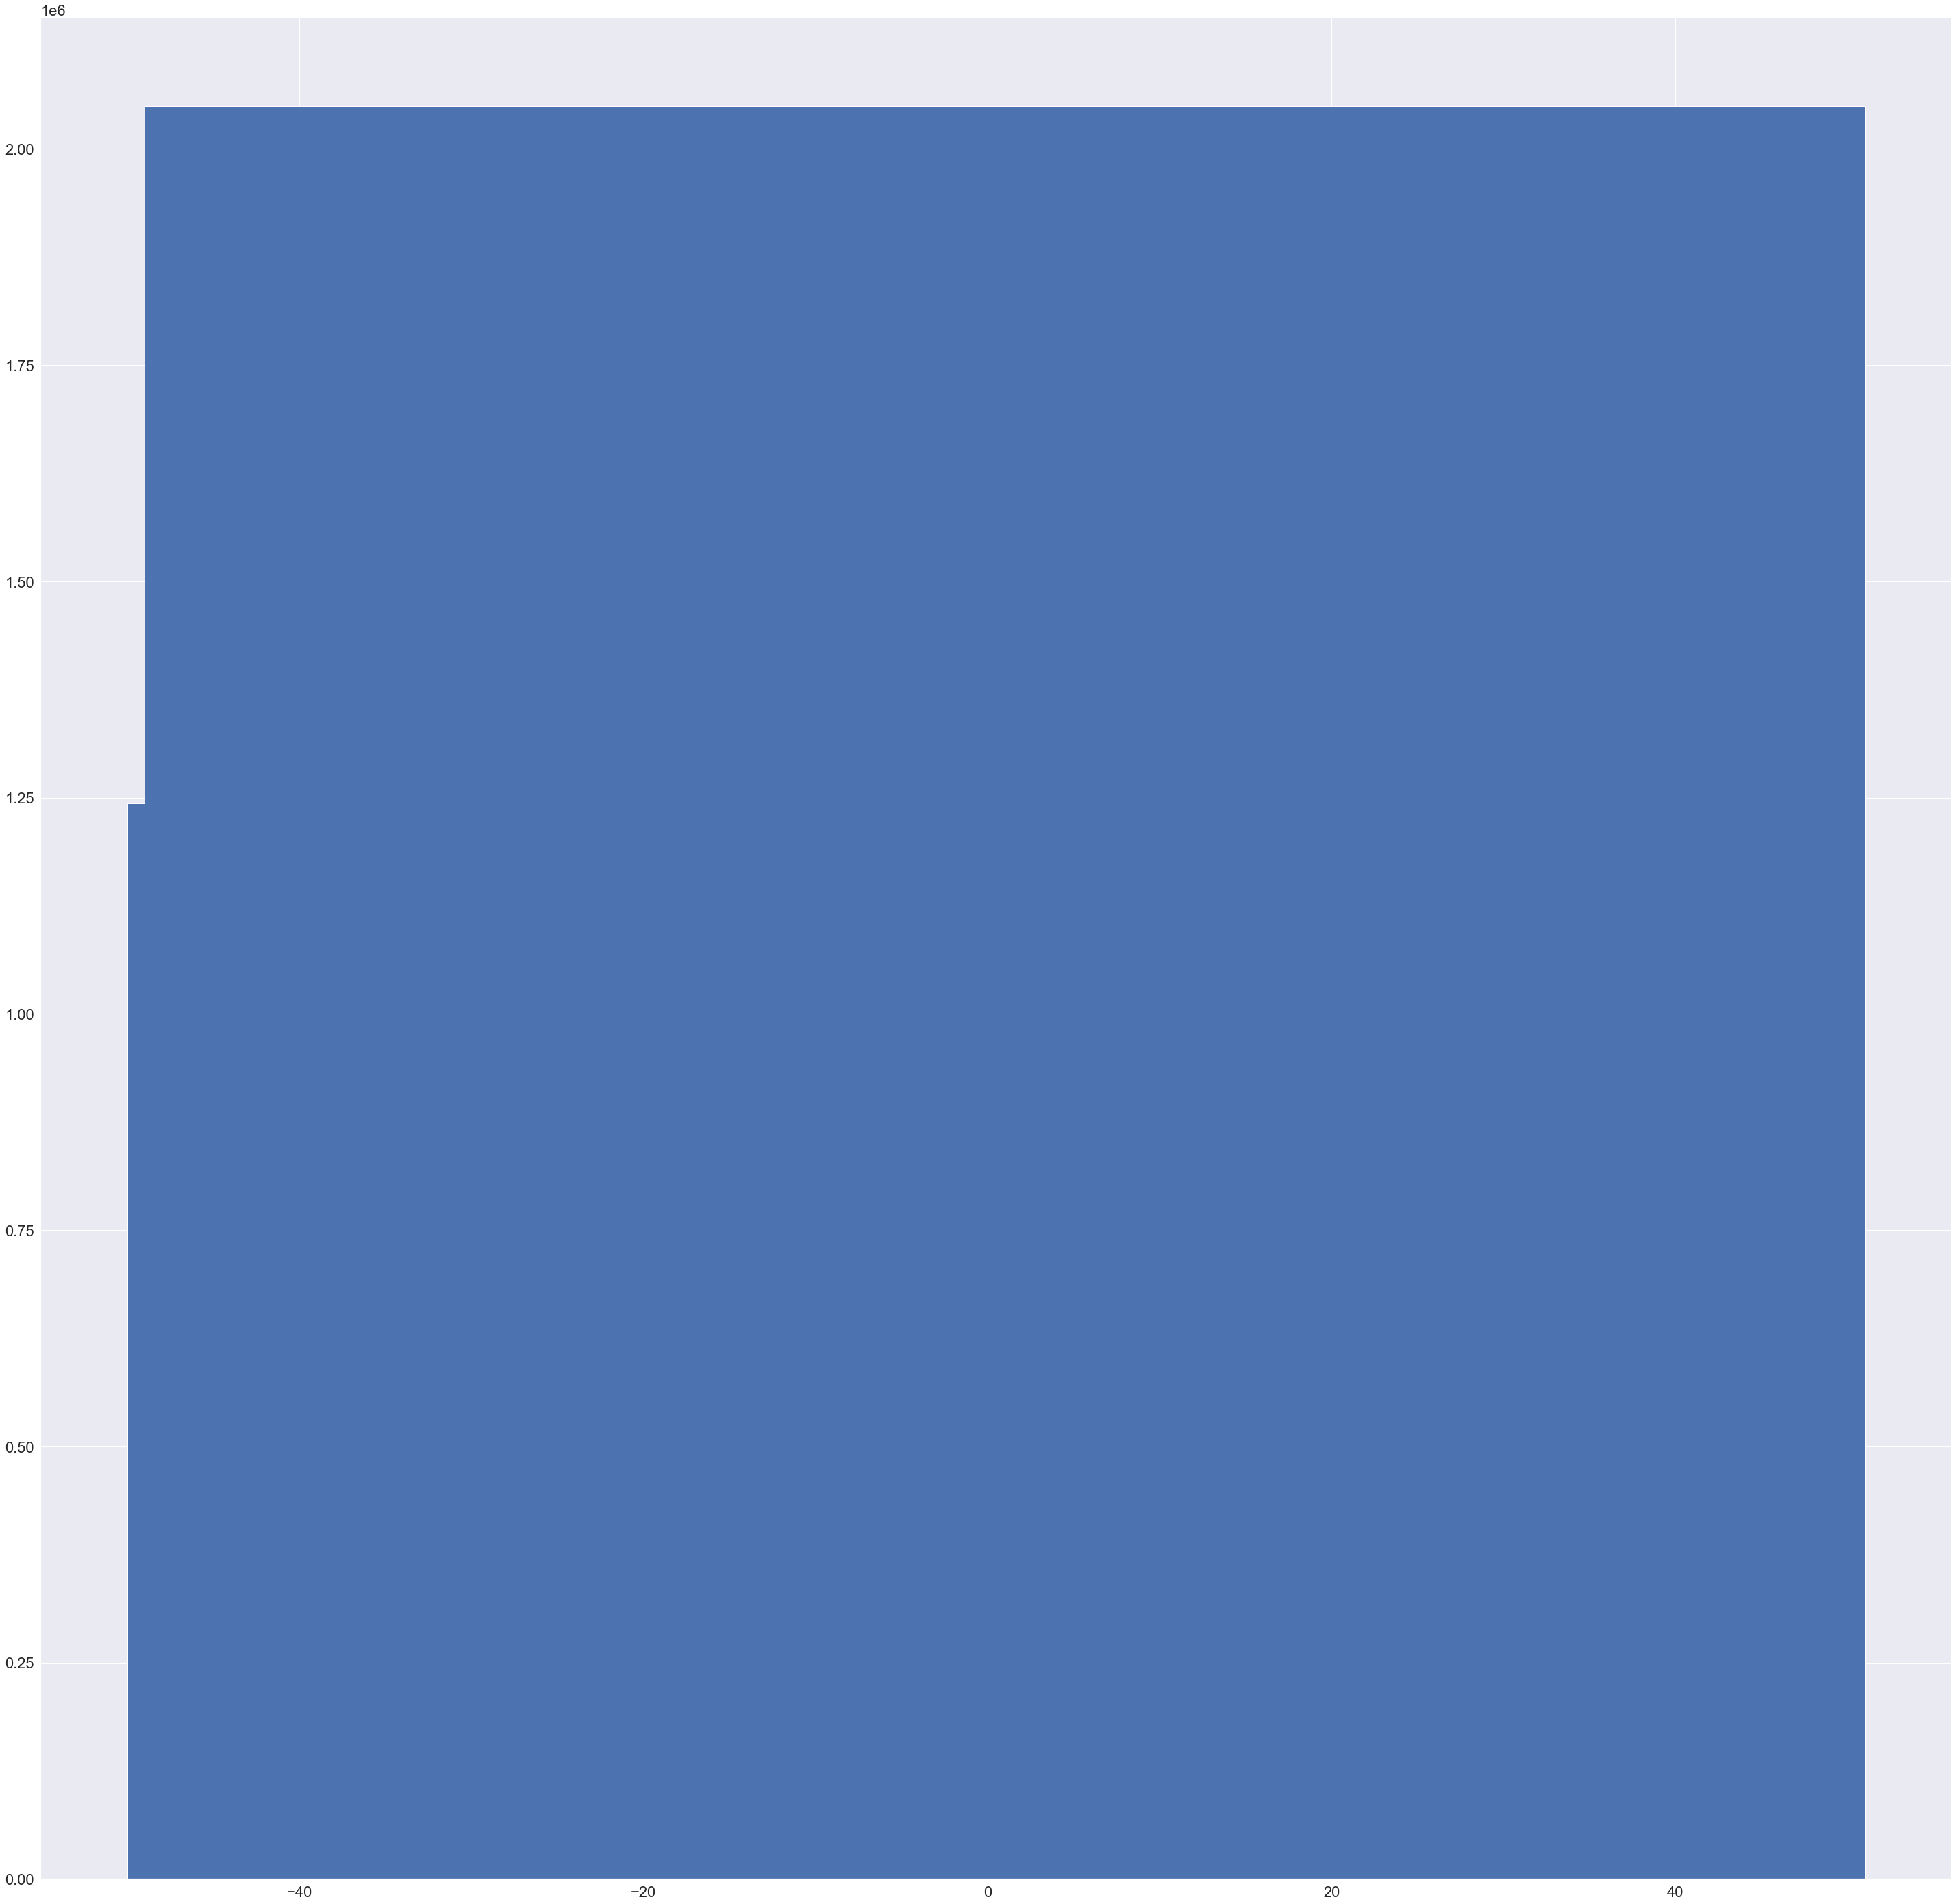

In [36]:
#year distribution
dataX = day[['yr']].yr.unique();
dataY = day.groupby('yr')['cnt'].sum();

plt.bar(dataX, dataY, width = 100);
plt.show();

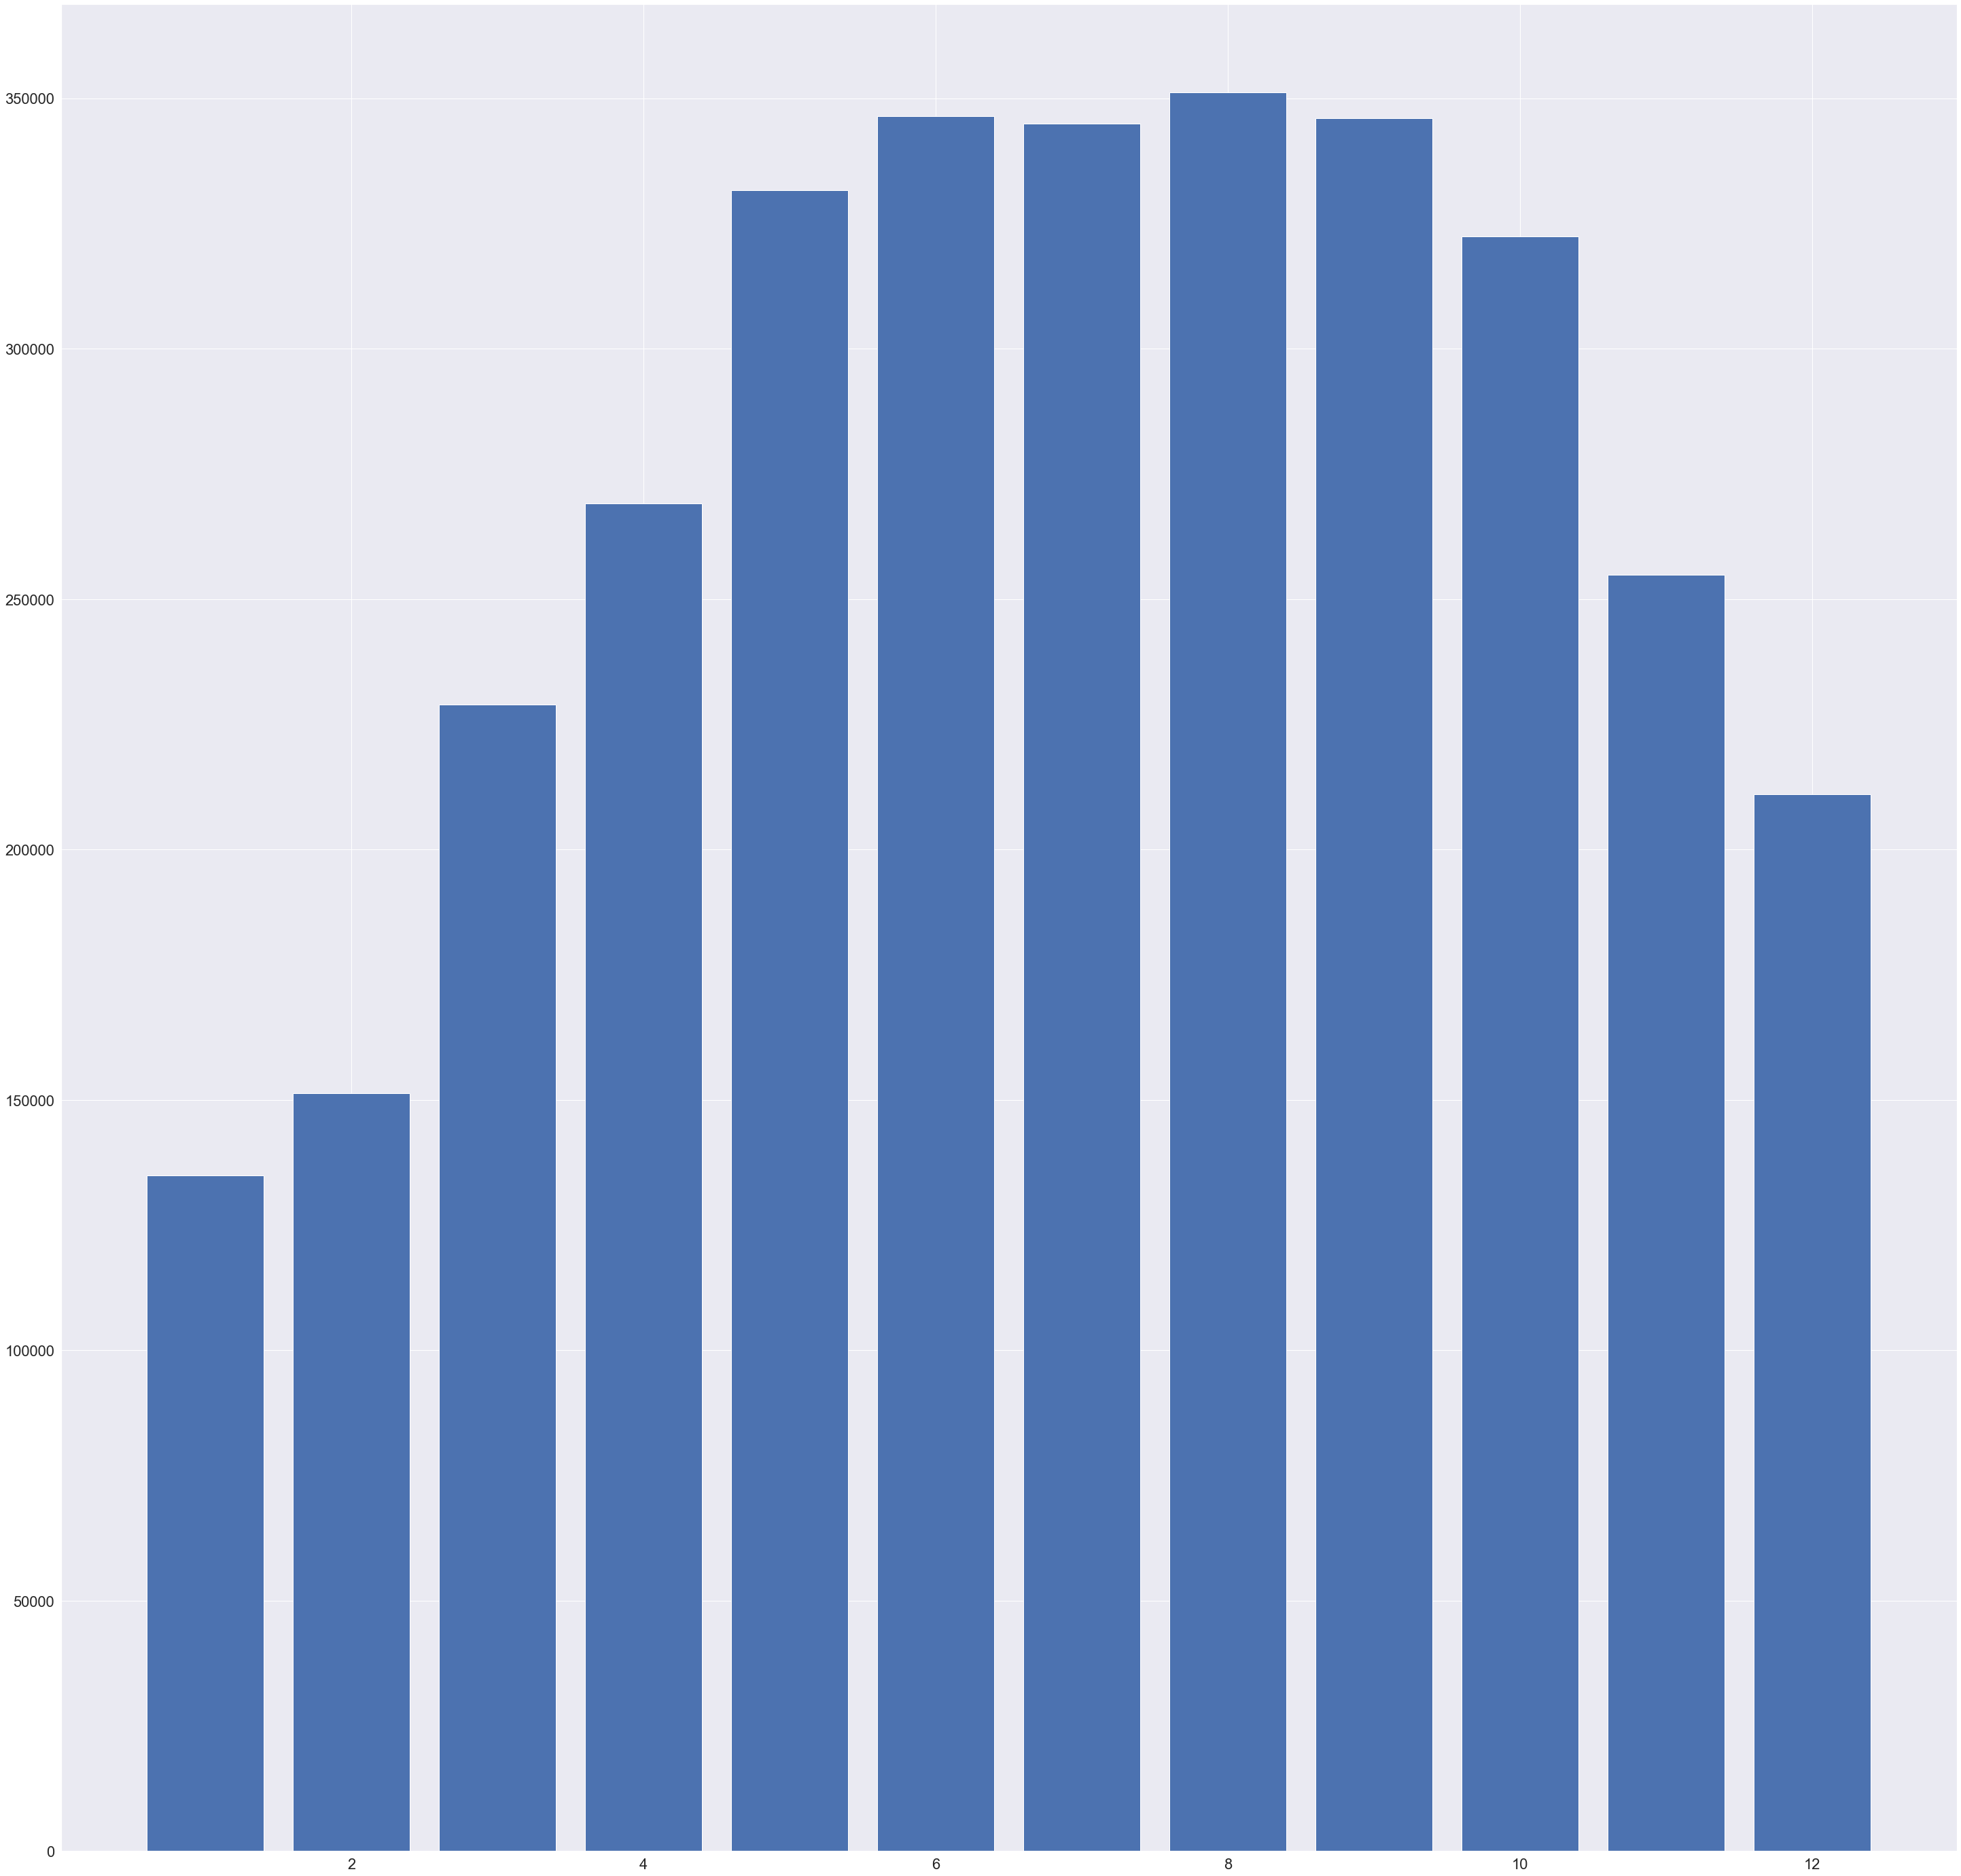

In [37]:
#month distribution
dataX = day[['mnth']].mnth.unique();
dataY = day.groupby('mnth')['cnt'].sum();

plt.bar(dataX, dataY);
plt.show();

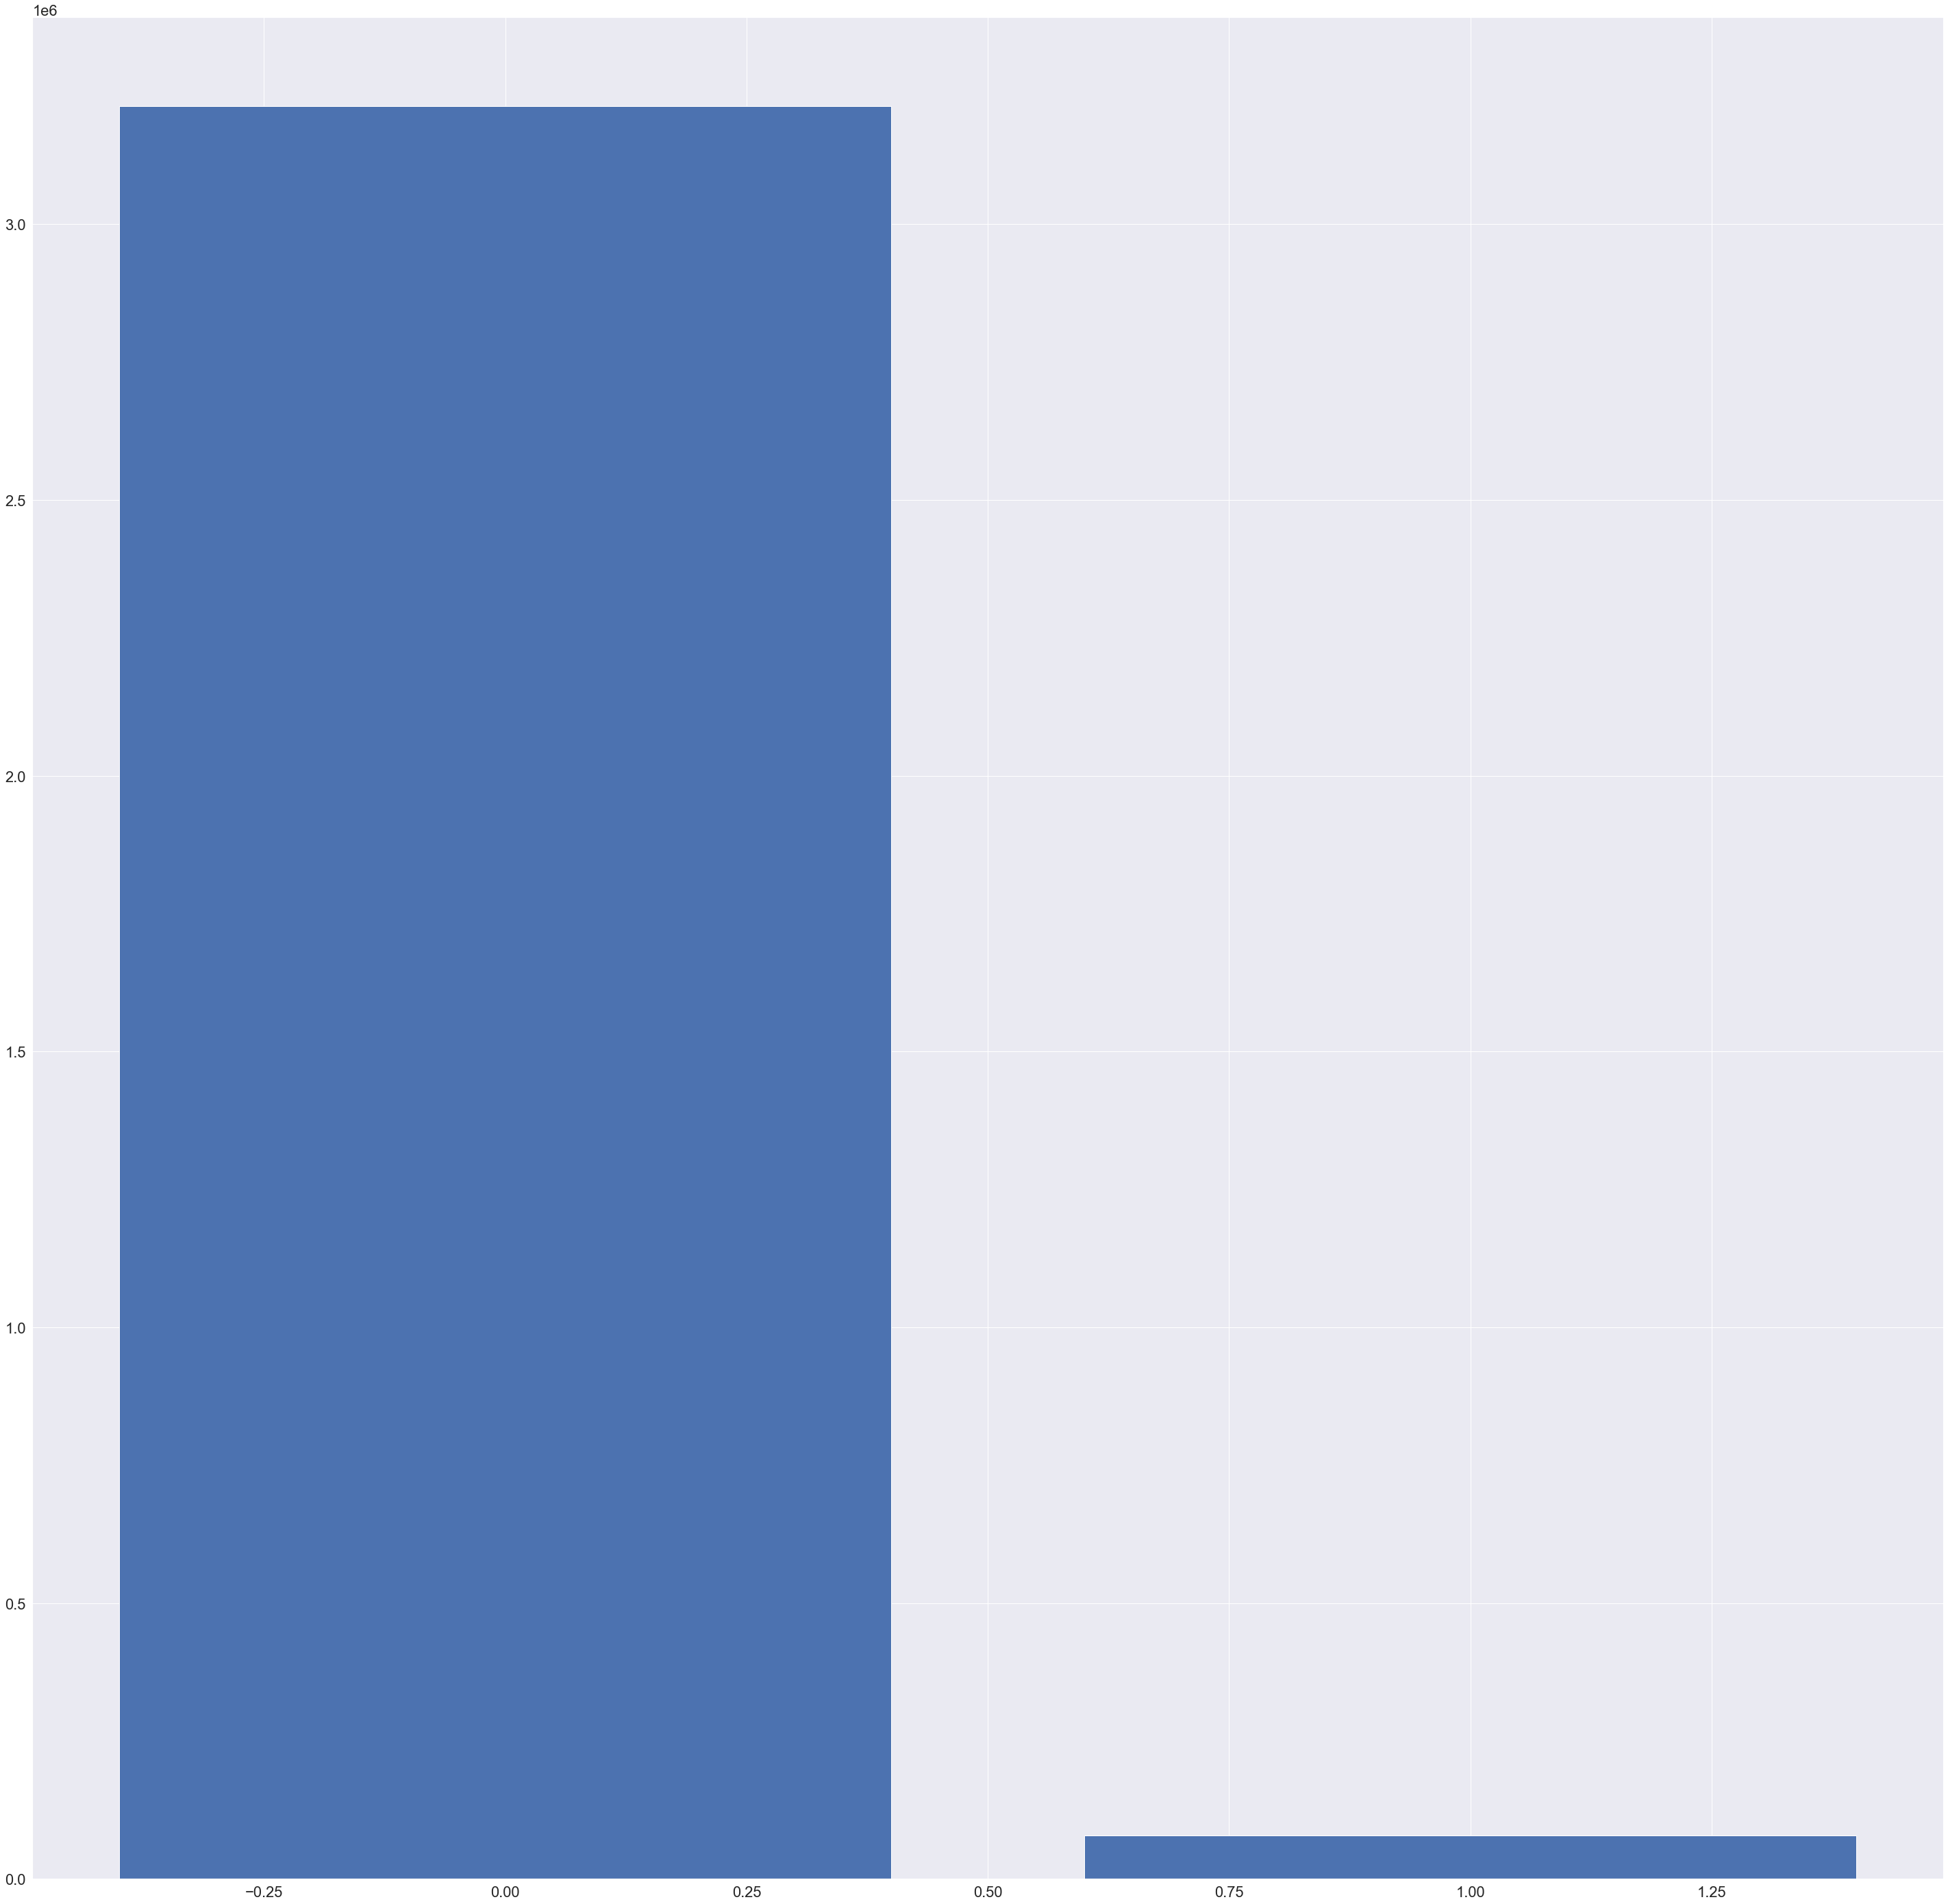

In [38]:
#holiday distribution
dataX = day[['holiday']].holiday.unique();

dataY = day.groupby('holiday')['cnt'].sum();

plt.bar(dataX, dataY);
plt.show();

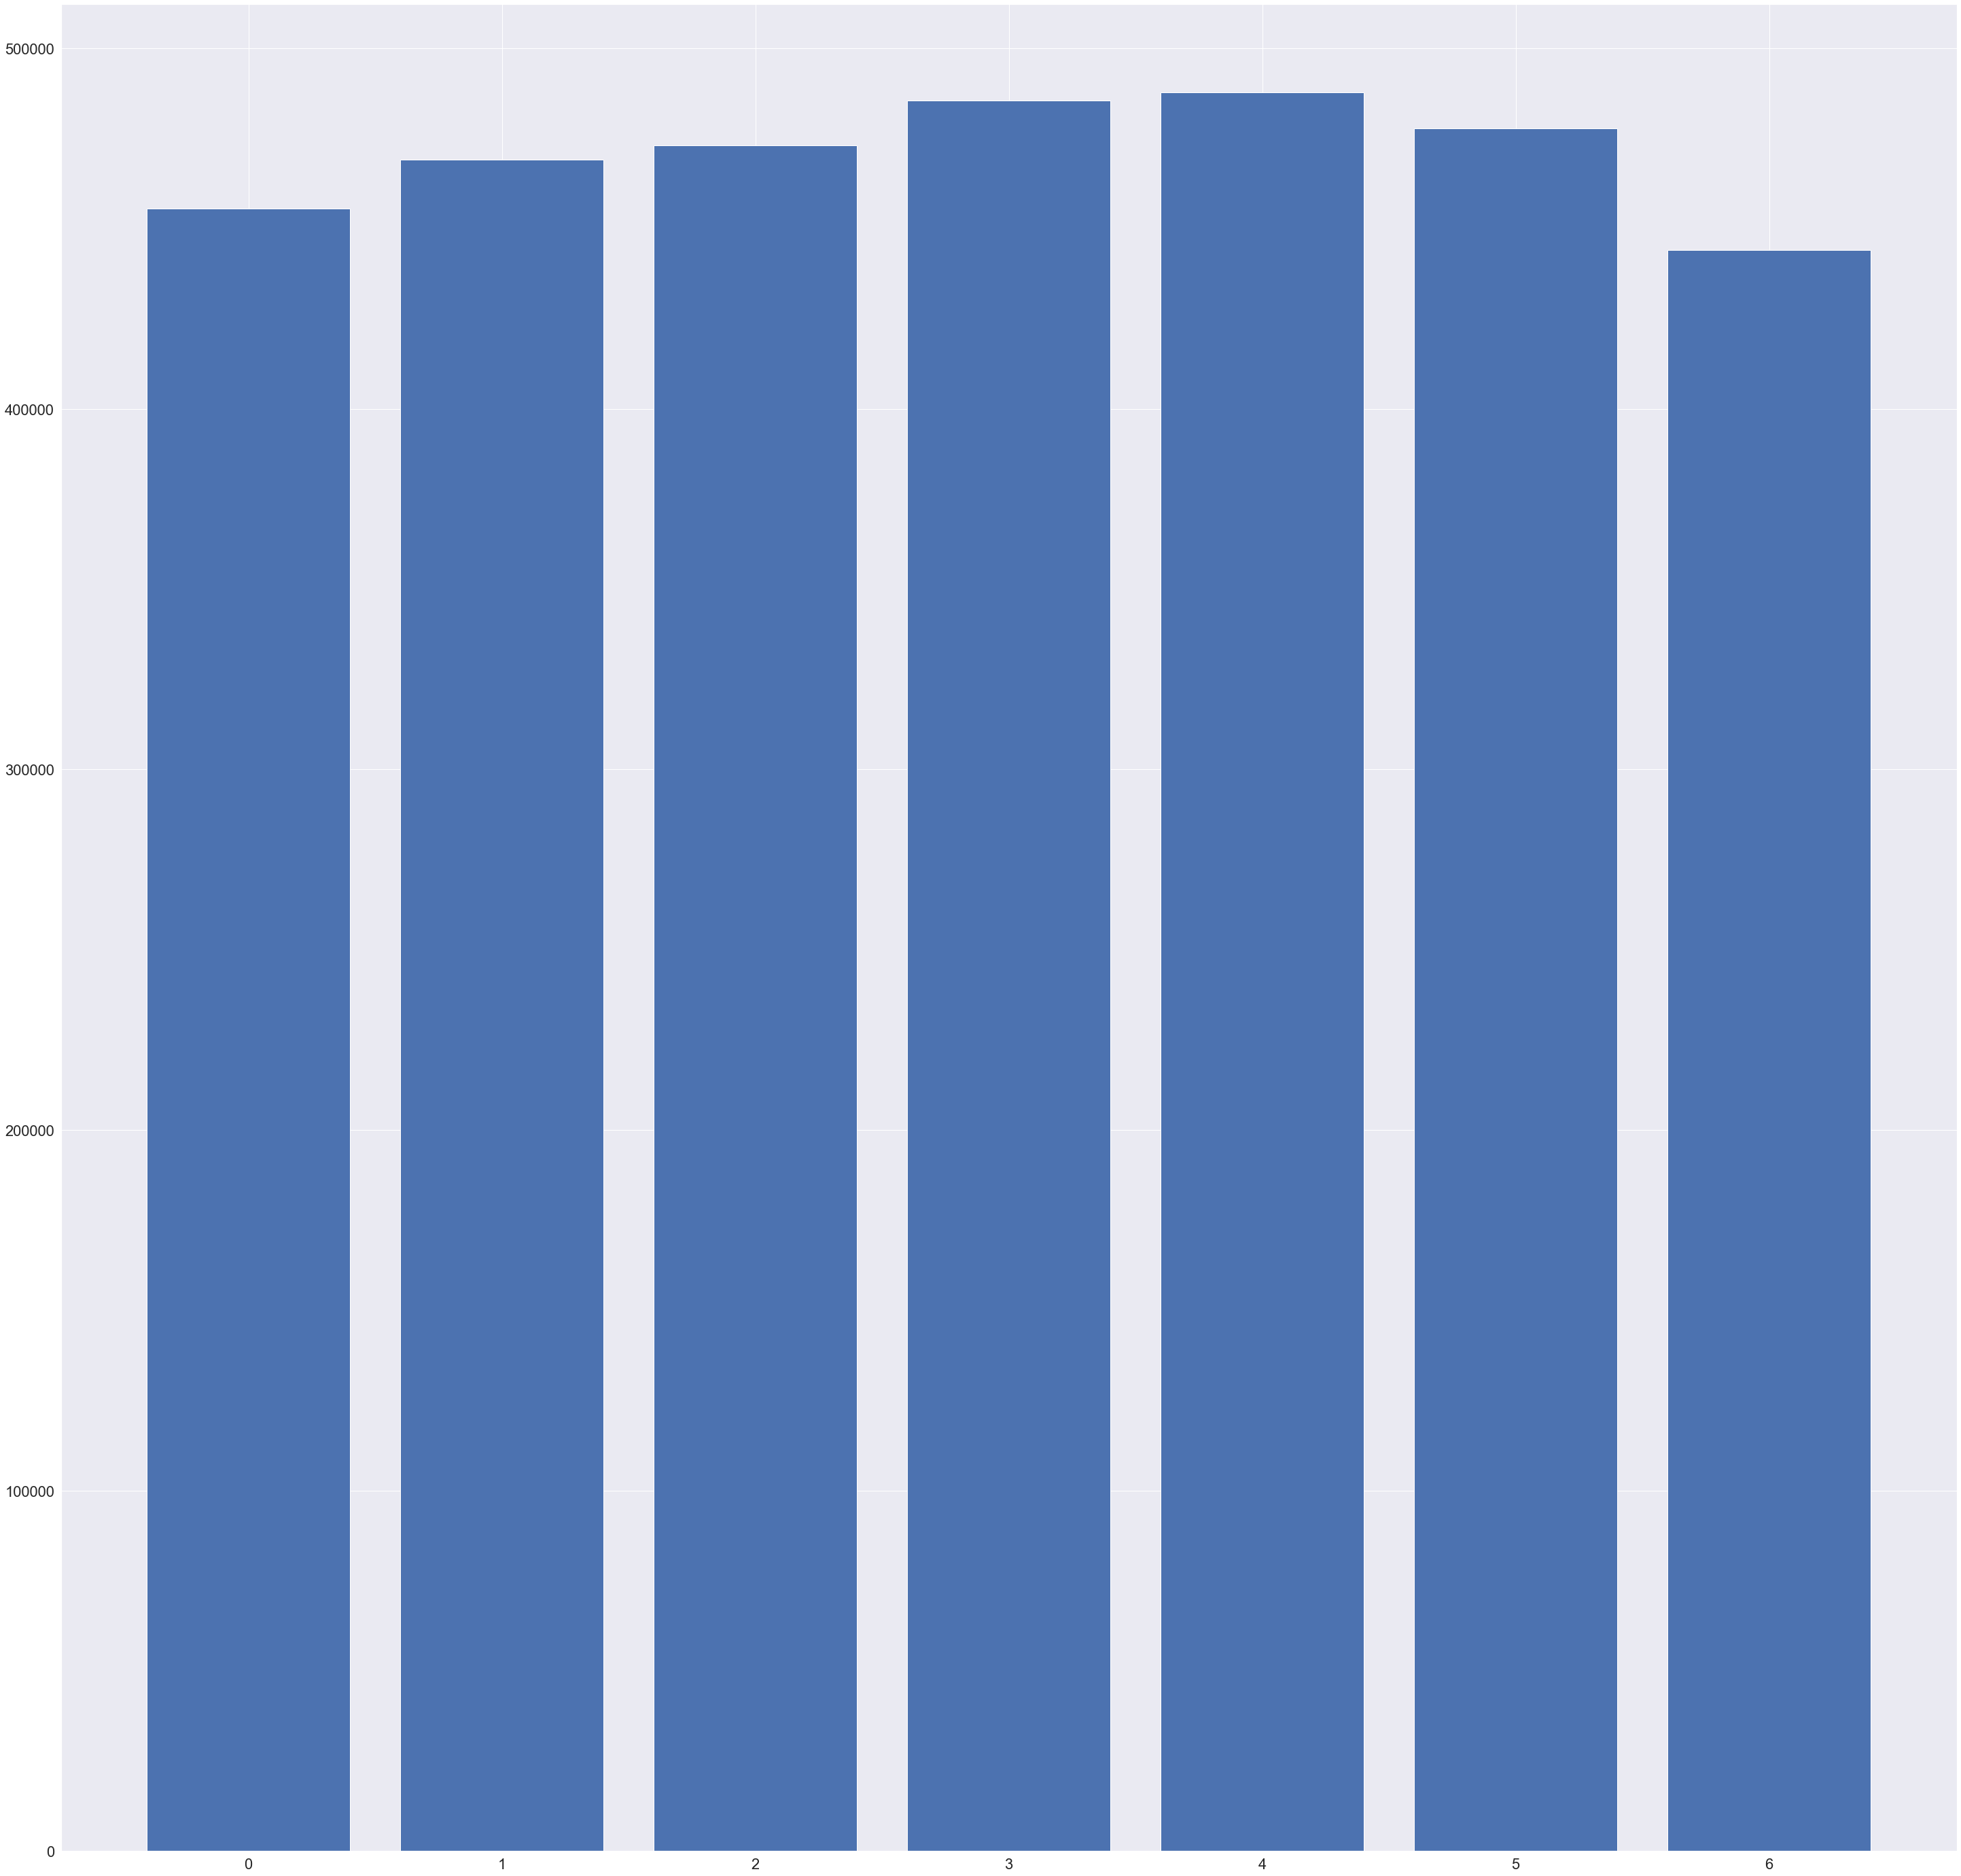

In [39]:
#weekday distribution
dataX = day[['weekday']].weekday.unique();

dataY = day.groupby('weekday')['cnt'].sum();

plt.bar(dataX, dataY);
plt.show();

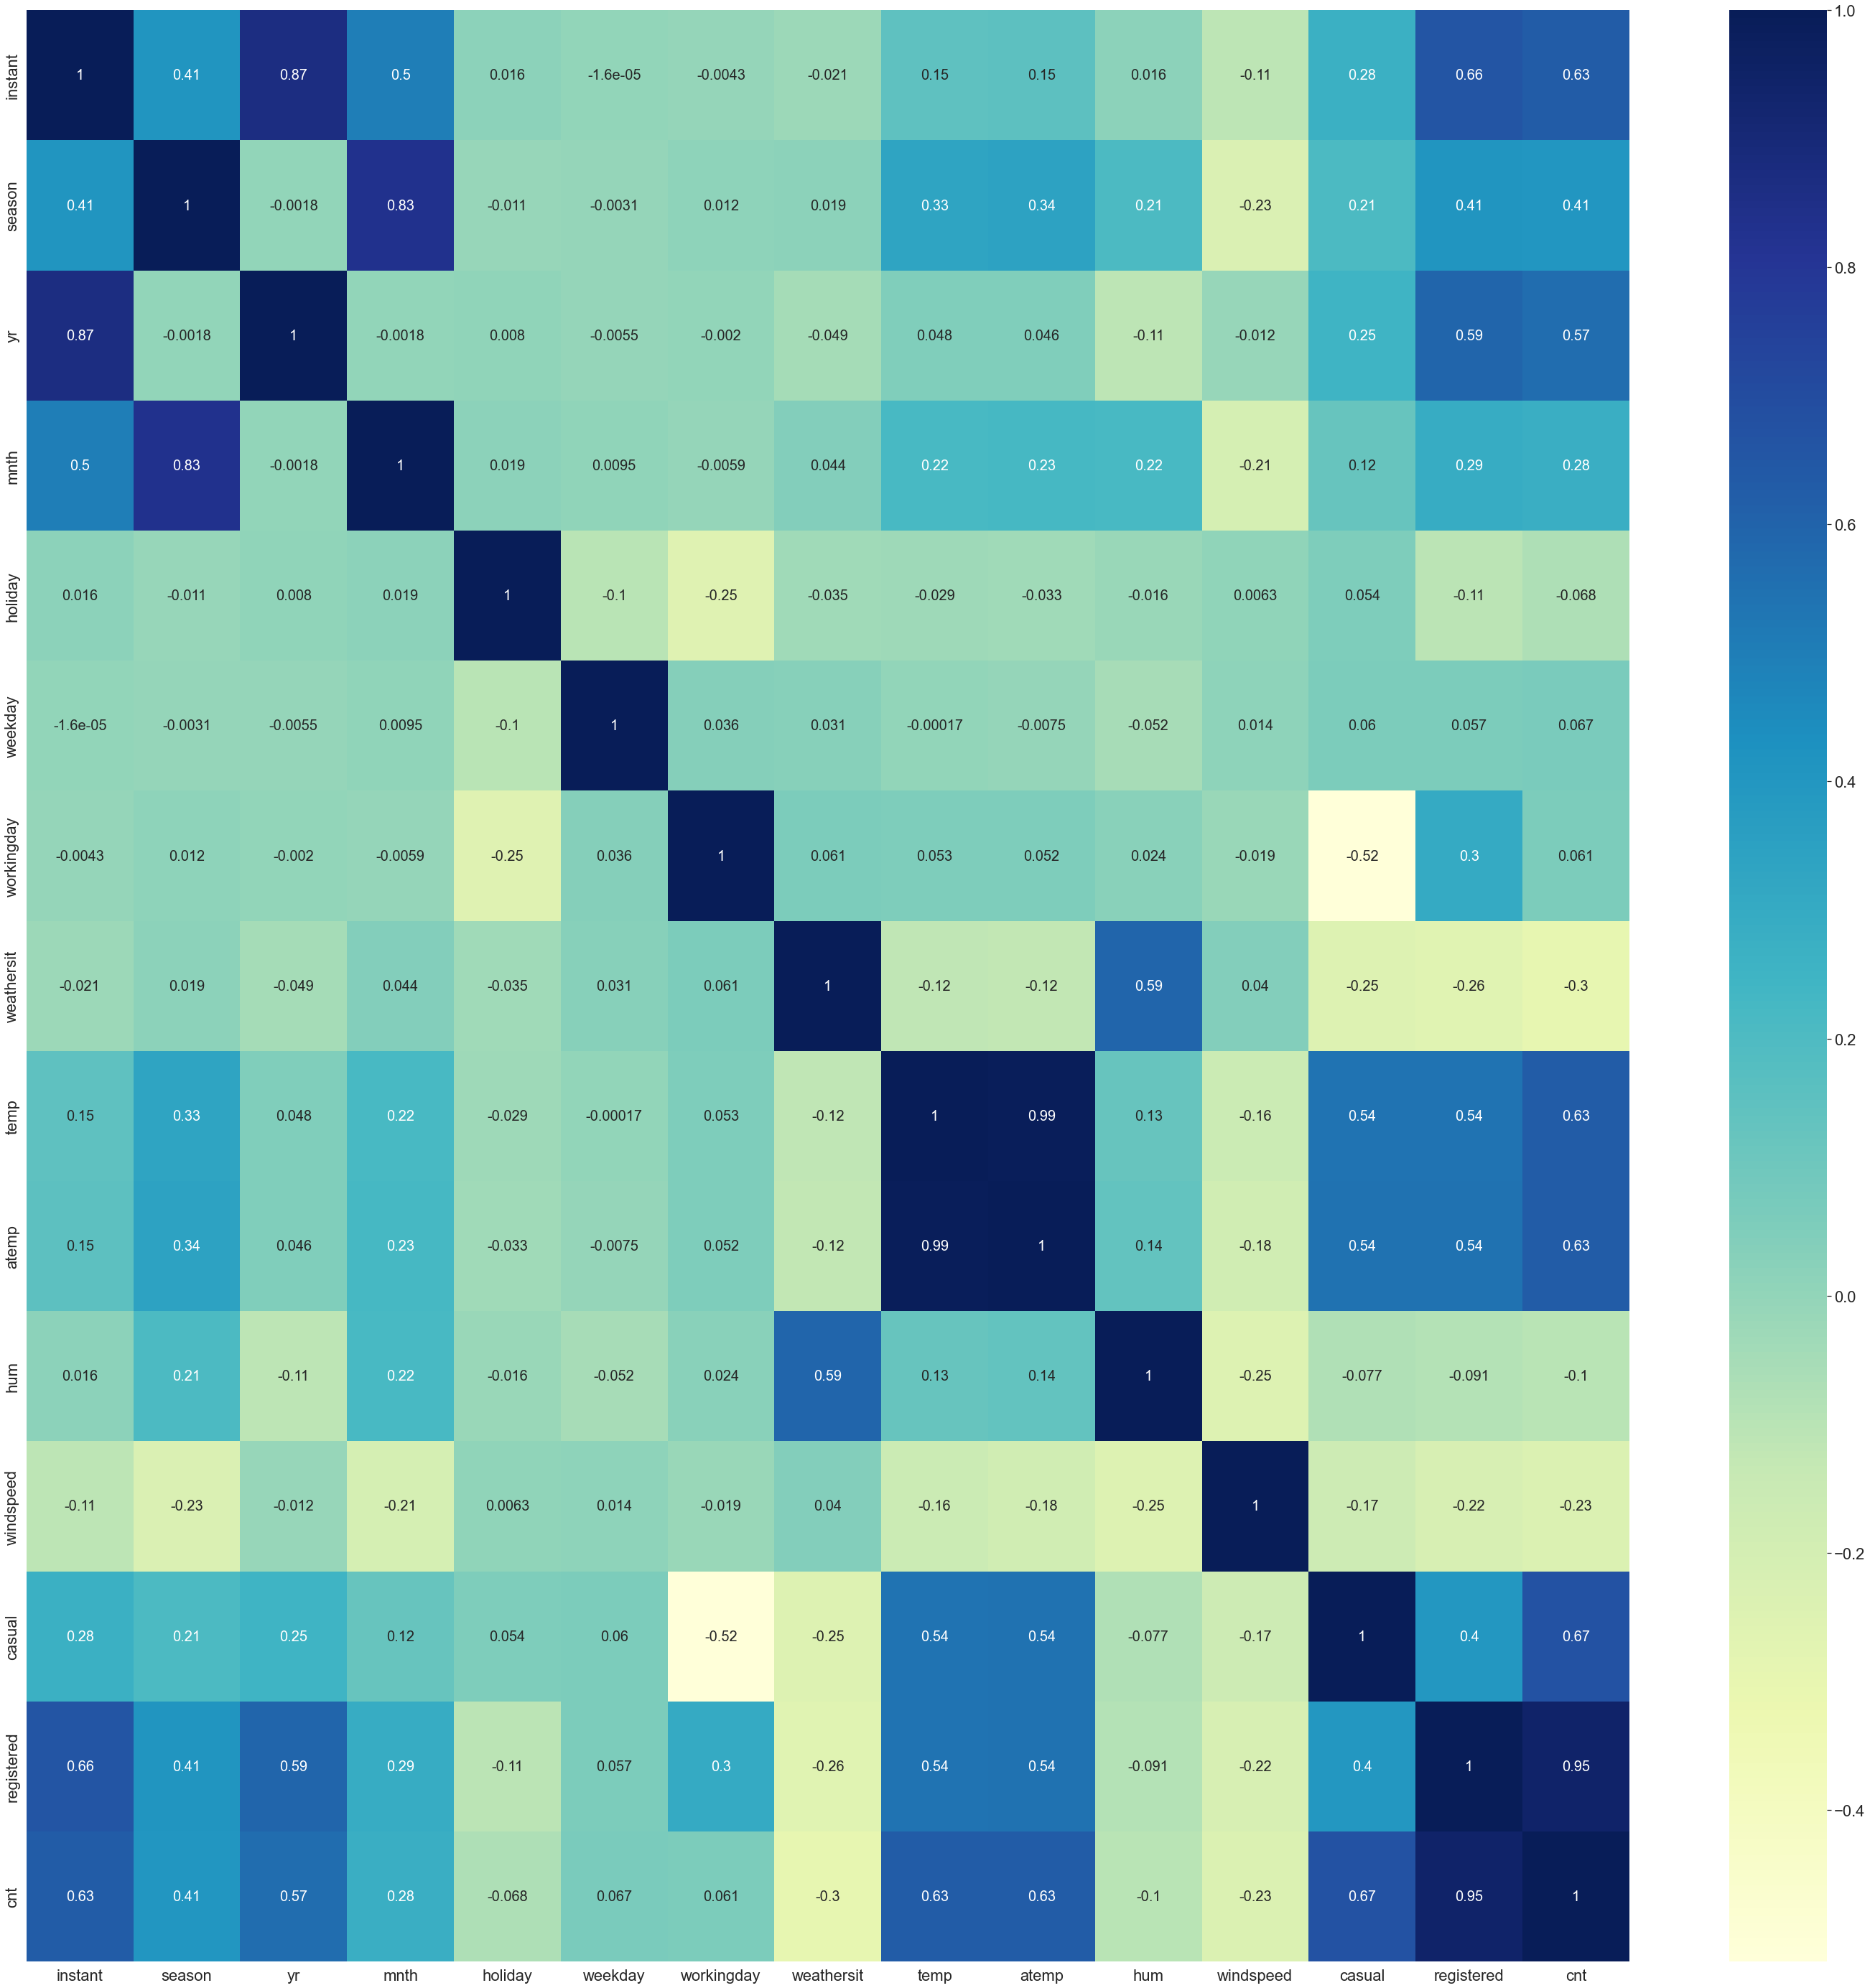

In [40]:
#metode selection (2) : heat-map
corr = day.corr()

sns.set(rc = {'figure.figsize':(50,50)}, font_scale=2);
sns.heatmap(corr, cmap="YlGnBu", annot = True, linewidths=0, annot_kws={"size": 20});
plt.show()

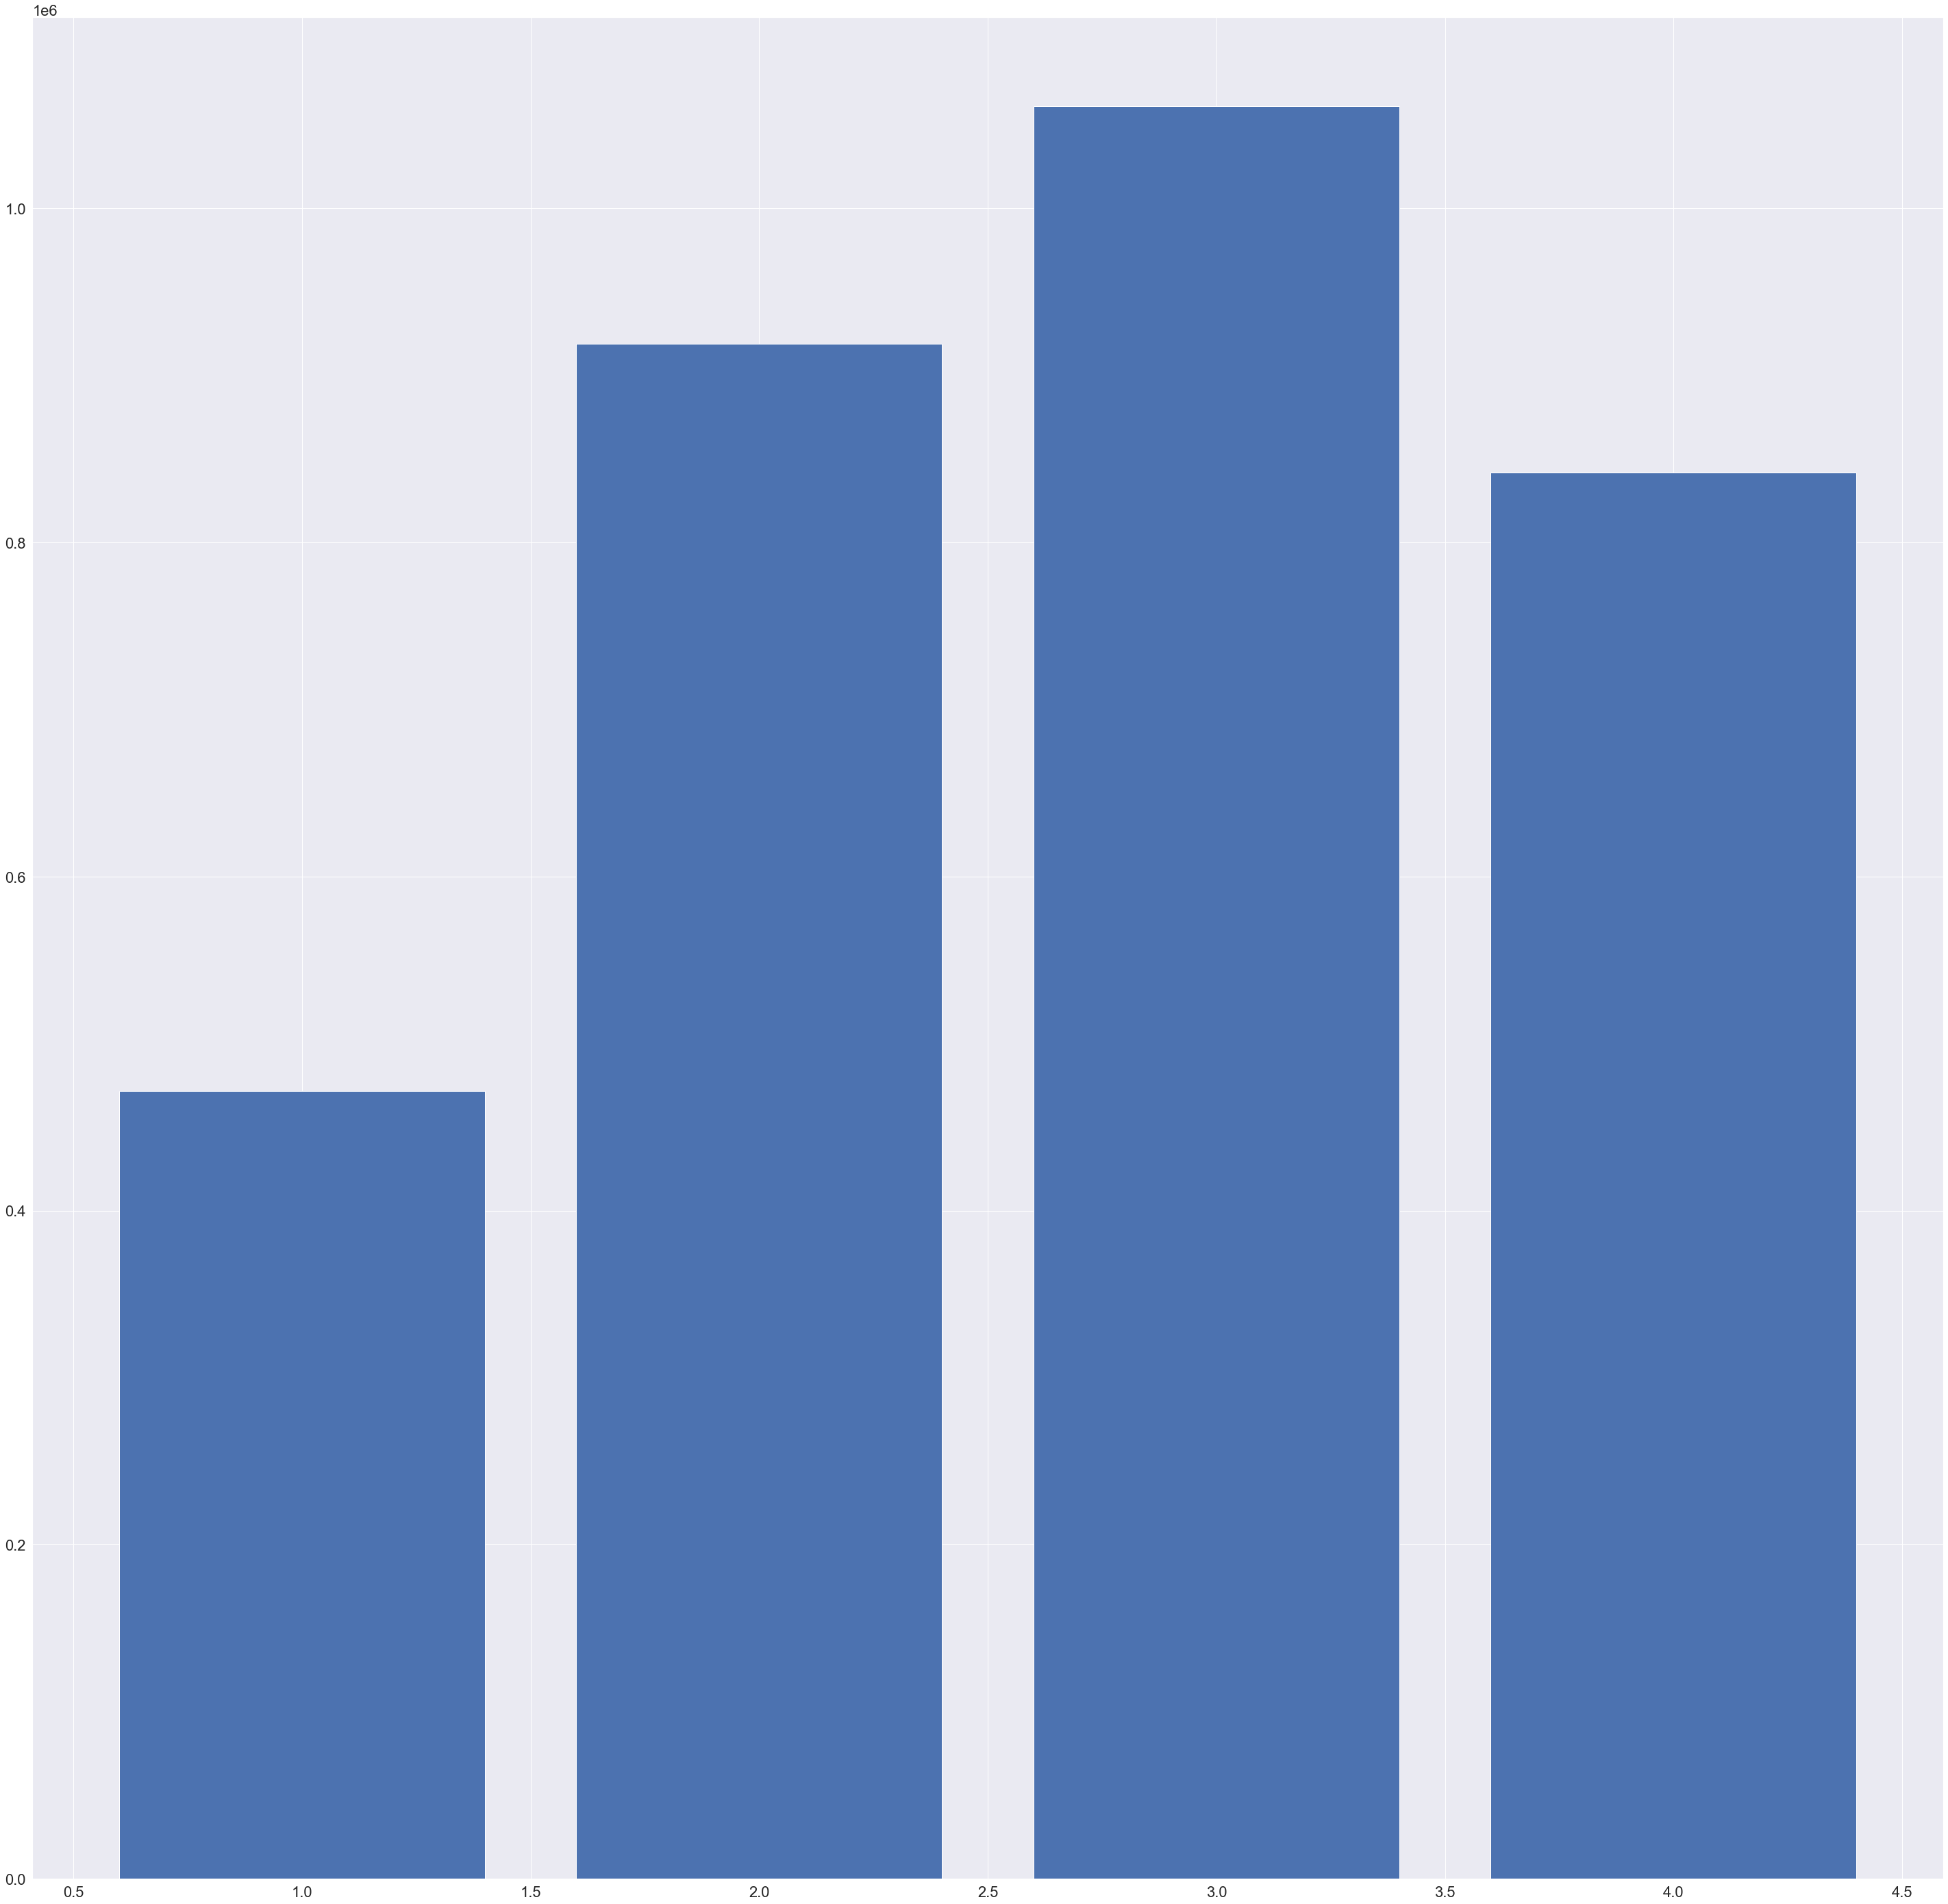

In [41]:
#season distribution
dataX = day[['season']].season.unique();

dataY = day.groupby('season')['cnt'].sum();

plt.bar(dataX, dataY);
plt.show();

C:\Users\William Surya Wijaya\AppData\Local\Temp\ipykernel_7060\2305861710.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


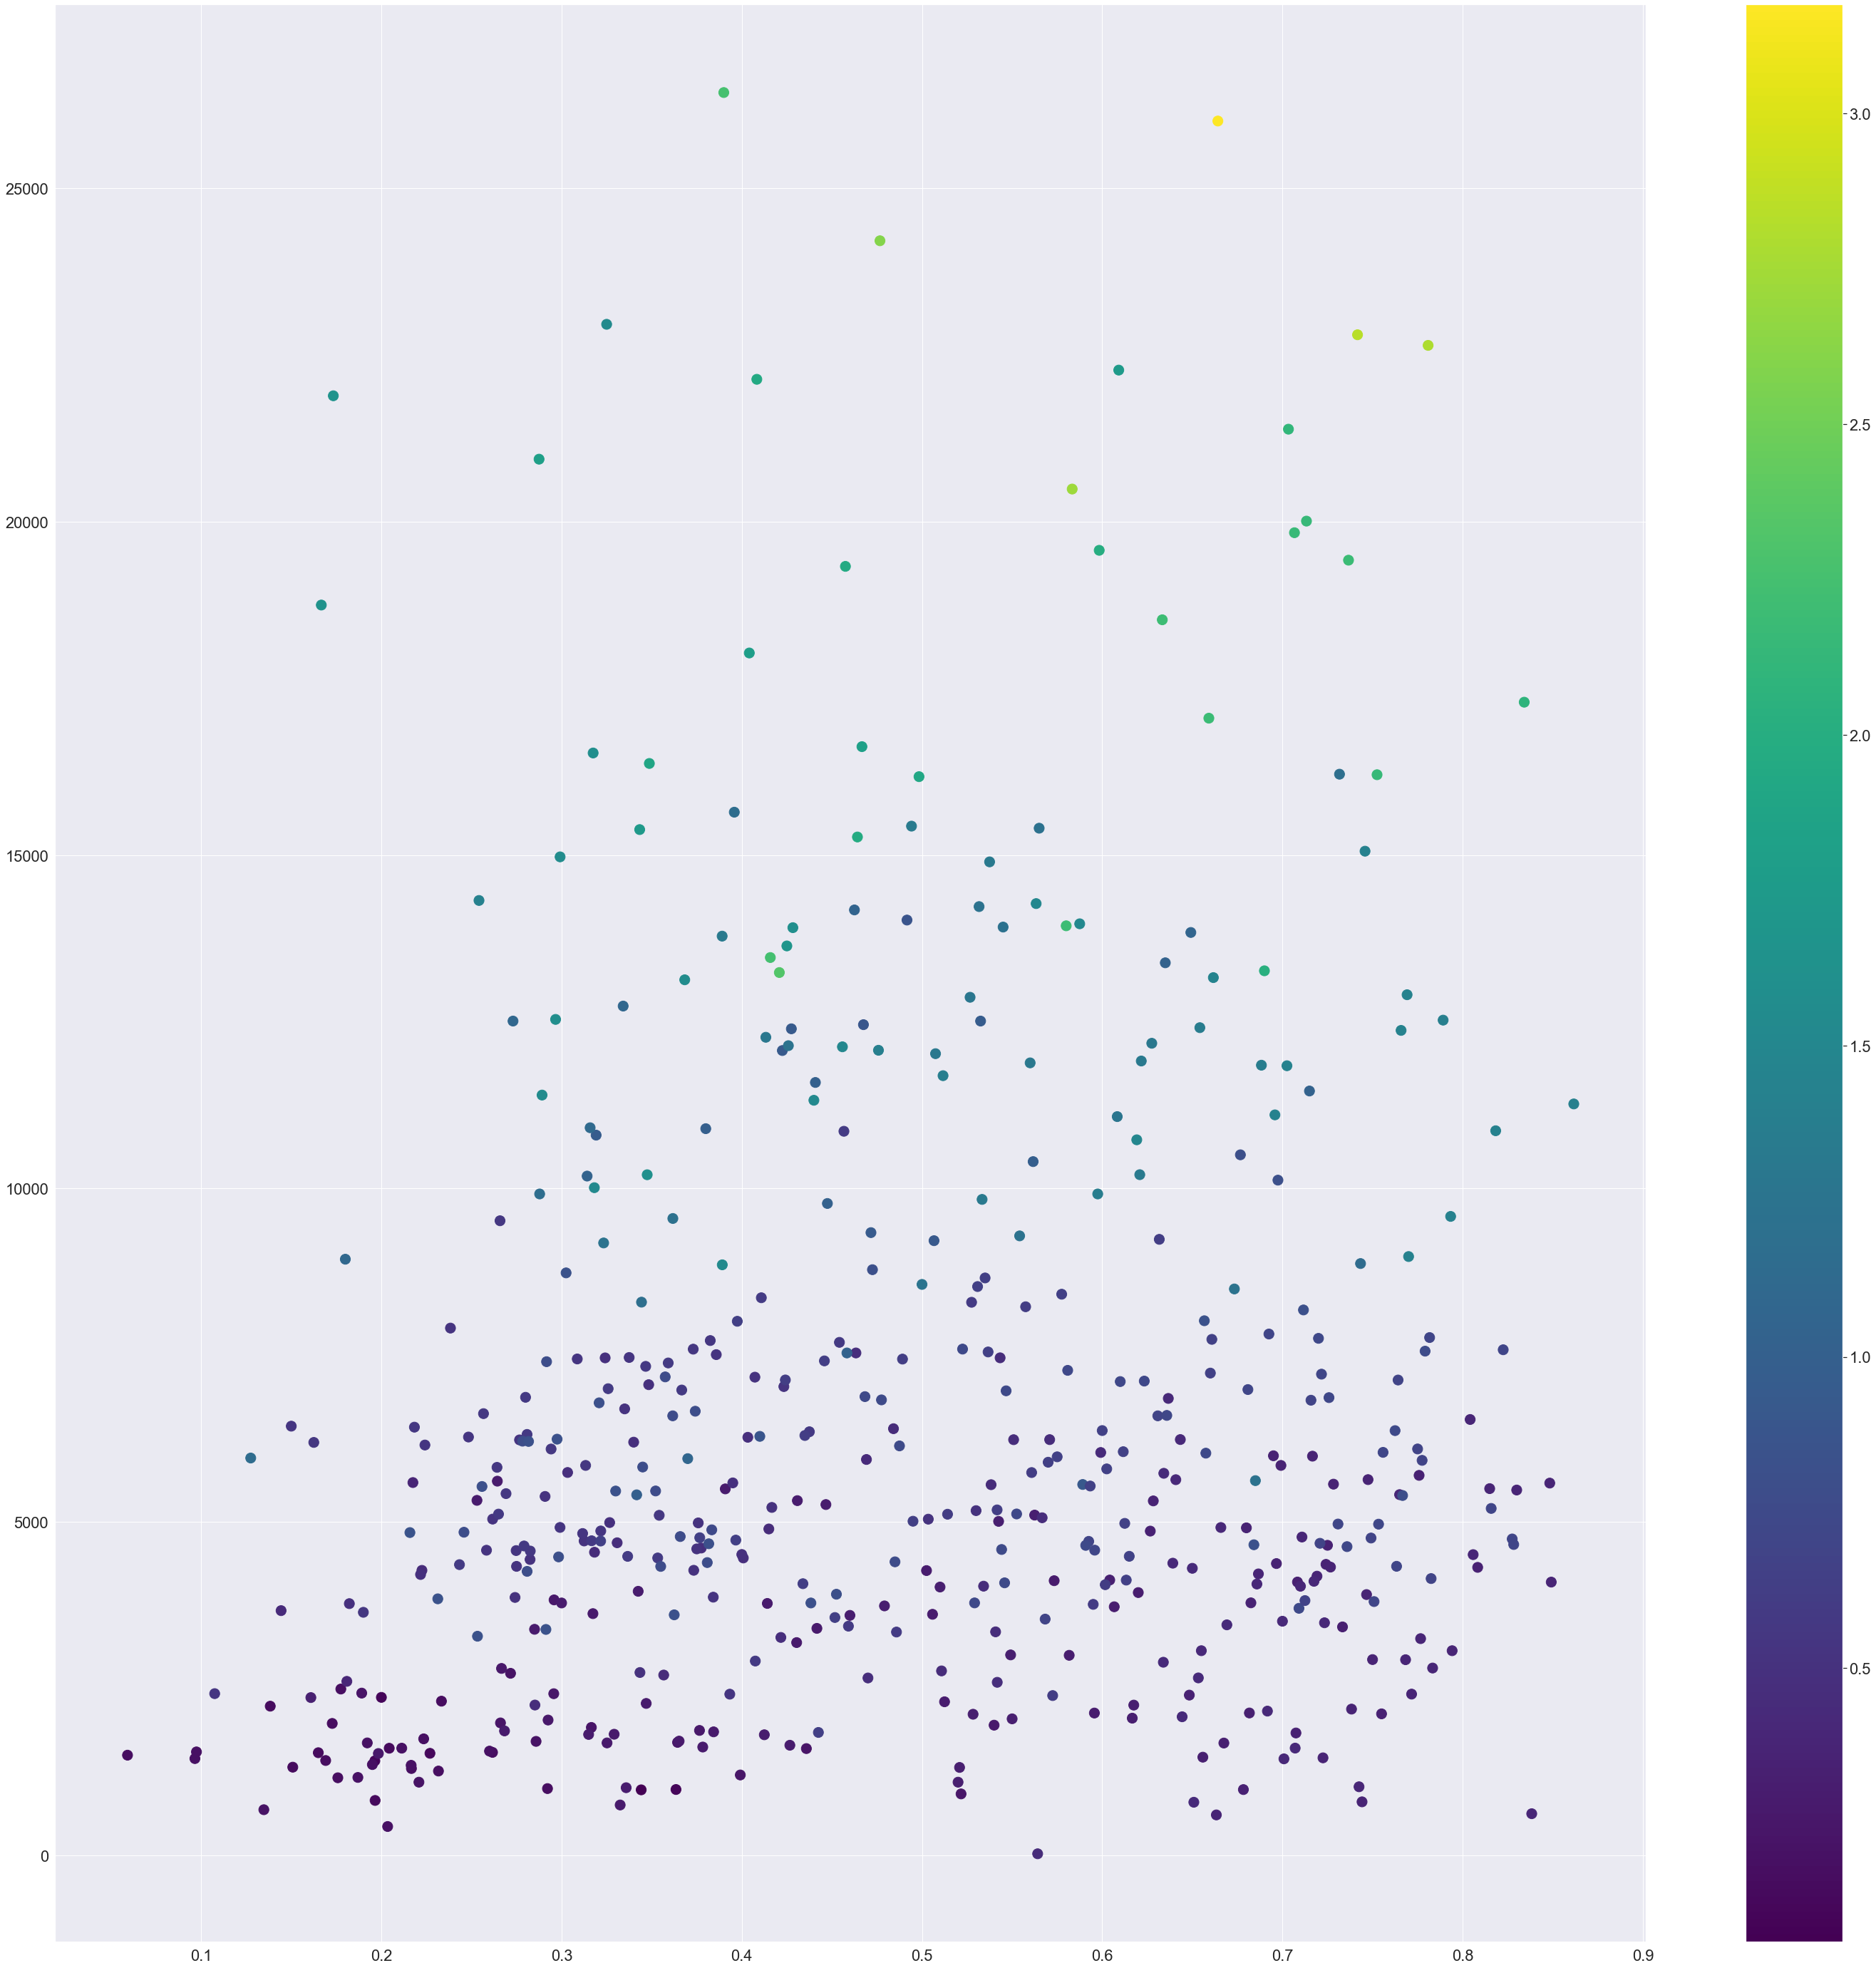

In [42]:
#temp distribution
dataX = day[['temp']].temp.unique();

dataY = day.groupby('temp')['cnt'].sum();

colors = day.groupby('temp')['temp'].sum();

plt.scatter(dataX, dataY, s=200, c=colors, cmap='viridis');
plt.colorbar()

plt.show();